In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
sns.set_theme(style="ticks", palette="pastel")

In [2]:
FINAL_DATA_PATH = "/content/drive/MyDrive/WaterPollution/waterPollution.csv"

In [3]:
data = pd.read_csv(FINAL_DATA_PATH)

In [4]:
def dataDimensions(data):
  print(f"Tuple Count: {data.shape[0]}\nFeature Count: {data.shape[1]}")
dataDimensions(data)

Tuple Count: 20000
Feature Count: 29


In [5]:
data.head(10)

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,waterBodyIdentifier,Country,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,combustibleRenewables_2009_2014,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
0,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.063310,FRDR609,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
1,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.046733,FRFR238,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
2,RW,EEA_3164-07-6,total,water,{massRatio},2009,2009-01--2009-12,132.859000,FRFR238,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
3,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2009,2009-01--2009-12,11.578376,FRFR327C,France,122.299437,30.831906,71176346.0,2.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
4,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,0.206800,ES014MSPFES-014-NR-038-000-02-02,Spain,93.677197,15.047884,50941692.0,4.0,-40055.250,0.729194,87.158924,4.363288,1.464509e+12,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84
5,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2009,2009-01--2009-12,2.477792,ES014MSPFES-014-NR-038-000-02-02,Spain,93.677197,15.047884,50941692.0,4.0,-40055.250,0.729194,87.158924,4.363288,1.464509e+12,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84
6,RW,CAS_7723-14-0,total,water,mg{P}/L,2009,2009-01--2009-12,0.013300,ES014MSPFES-014-NR-038-000-02-02,Spain,93.677197,15.047884,50941692.0,4.0,-40055.250,0.729194,87.158924,4.363288,1.464509e+12,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84
7,RW,EEA_3164-08-7,total,water,{massRatio},2009,2009-01--2009-12,165.232000,FRGR0220,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
8,RW,EEA_3131-01-9,total,water,%,2009,2009-01--2009-12,80.983300,FRGR0220,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
9,RW,EEA_3164-07-6,total,water,{massRatio},2009,2009-01--2009-12,86.659400,FRGR0220,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26


In [6]:
data.describe()

,phenomenonTimeReferenceYear,resultMeanValue,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,combustibleRenewables_2009_2014,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
count,20000.000000,20000.000000,19893.000000,19893.000000,1.989300e+04,20000.000000,19893.000000,19893.000000,19893.000000,19893.000000,1.989300e+04,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000
mean,2008.998700,34.444639,149.895102,26.227472,4.919348e+07,0.141400,114206.842878,0.130027,14.859312,4.652609,2.286783e+12,32.166075,7.663619,3.196126,23.519892,18.903705,11.206789,0.159449,2.073875,1.302482,23.312787
std,1.917859,174.643233,75.994558,6.790095,2.469506e+07,1.922314,144682.517527,0.260679,31.565912,3.444092,9.318293e+11,11.326430,3.279468,1.130070,6.551350,4.252571,4.901386,0.731725,3.013117,3.656386,5.958540
min,1991.000000,0.000015,14.548292,3.875411,5.300380e+05,0.000000,-83749.750000,0.000000,0.000000,1.064468,2.887150e+10,12.780000,2.200000,1.380000,0.000000,5.000000,1.450000,0.000000,0.000000,0.000000,0.760000
25%,2008.000000,0.114100,122.299437,23.733280,2.586796e+07,0.000000,21256.750000,0.005718,0.000000,4.363288,1.464509e+12,30.000000,5.440000,3.000000,17.700000,18.900000,9.000000,0.000000,0.000000,0.000000,22.260000
50%,2009.000000,2.000000,122.299437,30.831906,5.094169e+07,0.000000,75808.375000,0.005718,0.000000,4.457840,2.806036e+12,32.000000,10.000000,3.000000,26.000000,20.000000,9.000000,0.000000,0.000000,0.000000,22.260000
75%,2009.000000,10.975625,137.976566,30.831906,7.117635e+07,0.000000,75808.375000,0.032407,0.000000,4.457840,2.806036e+12,32.000000,10.000000,3.000000,26.000000,20.000000,12.400000,0.000000,2.000000,2.700000,27.250000
max,2017.000000,14108.000000,511.475928,38.767234,7.117635e+07,100.000000,582211.000000,0.729194,87.158924,25.982190,3.781699e+12,62.300000,21.400000,9.200000,44.050000,37.830000,22.900000,6.000000,17.210000,30.460000,47.830000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   parameterWaterBodyCategory                   20000 non-null  object 
 1   observedPropertyDeterminandCode              20000 non-null  object 
 2   procedureAnalysedFraction                    20000 non-null  object 
 3   procedureAnalysedMedia                       20000 non-null  object 
 4   resultUom                                    20000 non-null  object 
 5   phenomenonTimeReferenceYear                  20000 non-null  int64  
 6   parameterSamplingPeriod                      20000 non-null  object 
 7   resultMeanValue                              20000 non-null  float64
 8   waterBodyIdentifier                          20000 non-null  object 
 9   Country                                      20000 non-null  object 
 10

In [8]:
categoricalData = data.select_dtypes(include = ["object"]).columns
numericData = data.select_dtypes(include = ["int64","float64"]).columns
def printDtypes(categorical,numeric):
  print("CATEGORICAL FEATURES: ")
  [print(i) for i in categorical]
  print("-"*65)
  print("NUMERICAL FEATURES: ")
  [print(i) for i in numeric]
printDtypes(categoricalData,numericData)

CATEGORICAL FEATURES: 
parameterWaterBodyCategory
observedPropertyDeterminandCode
procedureAnalysedFraction
procedureAnalysedMedia
resultUom
parameterSamplingPeriod
waterBodyIdentifier
Country
-----------------------------------------------------------------
NUMERICAL FEATURES: 
phenomenonTimeReferenceYear
resultMeanValue
PopulationDensity
TerraMarineProtected_2016_2018
TouristMean_1990_2020
VenueCount
netMigration_2011_2018
droughts_floods_temperature
literacyRate_2010_2018
combustibleRenewables_2009_2014
gdp
composition_food_organic_waste_percent
composition_glass_percent
composition_metal_percent
composition_other_percent
composition_paper_cardboard_percent
composition_plastic_percent
composition_rubber_leather_percent
composition_wood_percent
composition_yard_garden_green_waste_percent
waste_treatment_recycling_percent


In [9]:
data.isna().sum()

parameterWaterBodyCategory                       0
observedPropertyDeterminandCode                  0
procedureAnalysedFraction                        0
procedureAnalysedMedia                           0
resultUom                                        0
phenomenonTimeReferenceYear                      0
parameterSamplingPeriod                          0
resultMeanValue                                  0
waterBodyIdentifier                              0
Country                                          0
PopulationDensity                              107
TerraMarineProtected_2016_2018                 107
TouristMean_1990_2020                          107
VenueCount                                       0
netMigration_2011_2018                         107
droughts_floods_temperature                    107
literacyRate_2010_2018                         107
combustibleRenewables_2009_2014                107
gdp                                            107
composition_food_organic_waste_

In [20]:
data.groupby(["Country"]).mean()

,phenomenonTimeReferenceYear,resultMeanValue,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,combustibleRenewables_2009_2014,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
Country,,,,,,,,,,,,,,,,,,,,,
Austria,2008.835165,57.796168,107.127967,28.413315,19909000.0,0.153846,74021.250,0.038153,0.000000,13.546450,4.200405e+11,31.40,7.00,4.40,18.50,19.70,11.10,0.00,7.90,0.00,25.660
Belarus,2009.000000,5.024231,46.719504,9.406082,2220315.0,0.000000,14471.375,0.021959,11.084062,4.214979,5.918702e+10,30.00,8.00,2.00,35.00,5.00,12.00,6.00,2.00,0.00,16.000
Belgium,2008.869732,42.280024,377.379590,24.625503,6496961.0,0.130268,62334.000,0.001692,0.000000,3.106285,5.151026e+11,14.18,3.10,1.91,40.14,18.38,13.94,0.00,2.37,5.84,34.303
Bulgaria,2009.263975,52.151408,64.711100,28.293704,4836884.0,0.546584,-6059.125,0.008553,10.928050,5.478176,5.679241e+10,24.35,5.83,1.98,17.93,14.18,12.15,1.96,2.48,19.18,19.030
Croatia,2010.000000,24.142772,73.049375,23.556621,7841461.0,0.000000,-9812.125,0.002494,11.013929,13.599492,6.109527e+10,30.90,3.70,2.10,11.50,23.20,22.90,0.00,0.00,5.70,16.320
Czech Republic,2012.870564,3.960063,137.657705,21.999092,6063076.0,0.035491,21256.750,0.155746,11.092559,5.758580,2.313405e+11,62.30,2.40,8.40,14.90,9.10,2.20,0.00,0.70,0.00,25.500
Denmark,2008.146341,2.266686,137.976566,17.870784,6398076.0,1.012195,22854.875,0.000000,0.000000,12.109768,3.475197e+11,12.78,5.78,6.29,23.86,11.57,1.61,0.00,7.65,30.46,27.270
Finland,2009.188732,11.920041,18.148547,14.177182,2147000.0,0.104225,18927.000,0.000387,0.000000,21.007457,2.526922e+11,35.88,9.24,1.70,13.13,37.83,1.45,0.00,0.73,0.00,28.120
France,2008.739157,43.144192,122.299437,30.831906,71176346.0,0.095746,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.00,10.00,3.00,26.00,20.00,9.00,0.00,0.00,0.00,22.260


# Data Visualization

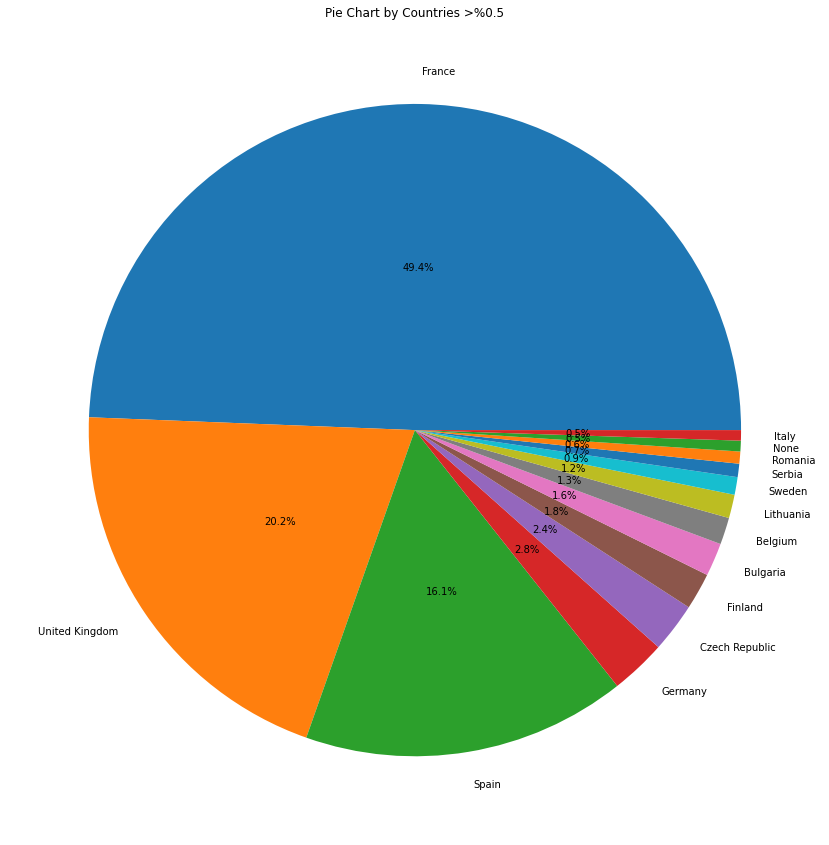

In [10]:
plt.figure(figsize=(15,15))
plt.pie(x=data["Country"].value_counts()[:-15],
        autopct="%.1f%%",
        labels = data["Country"].value_counts().keys()[:-15],
        pctdistance = 0.5)
plt.title("Pie Chart by Countries >%0.5")
plt.show()

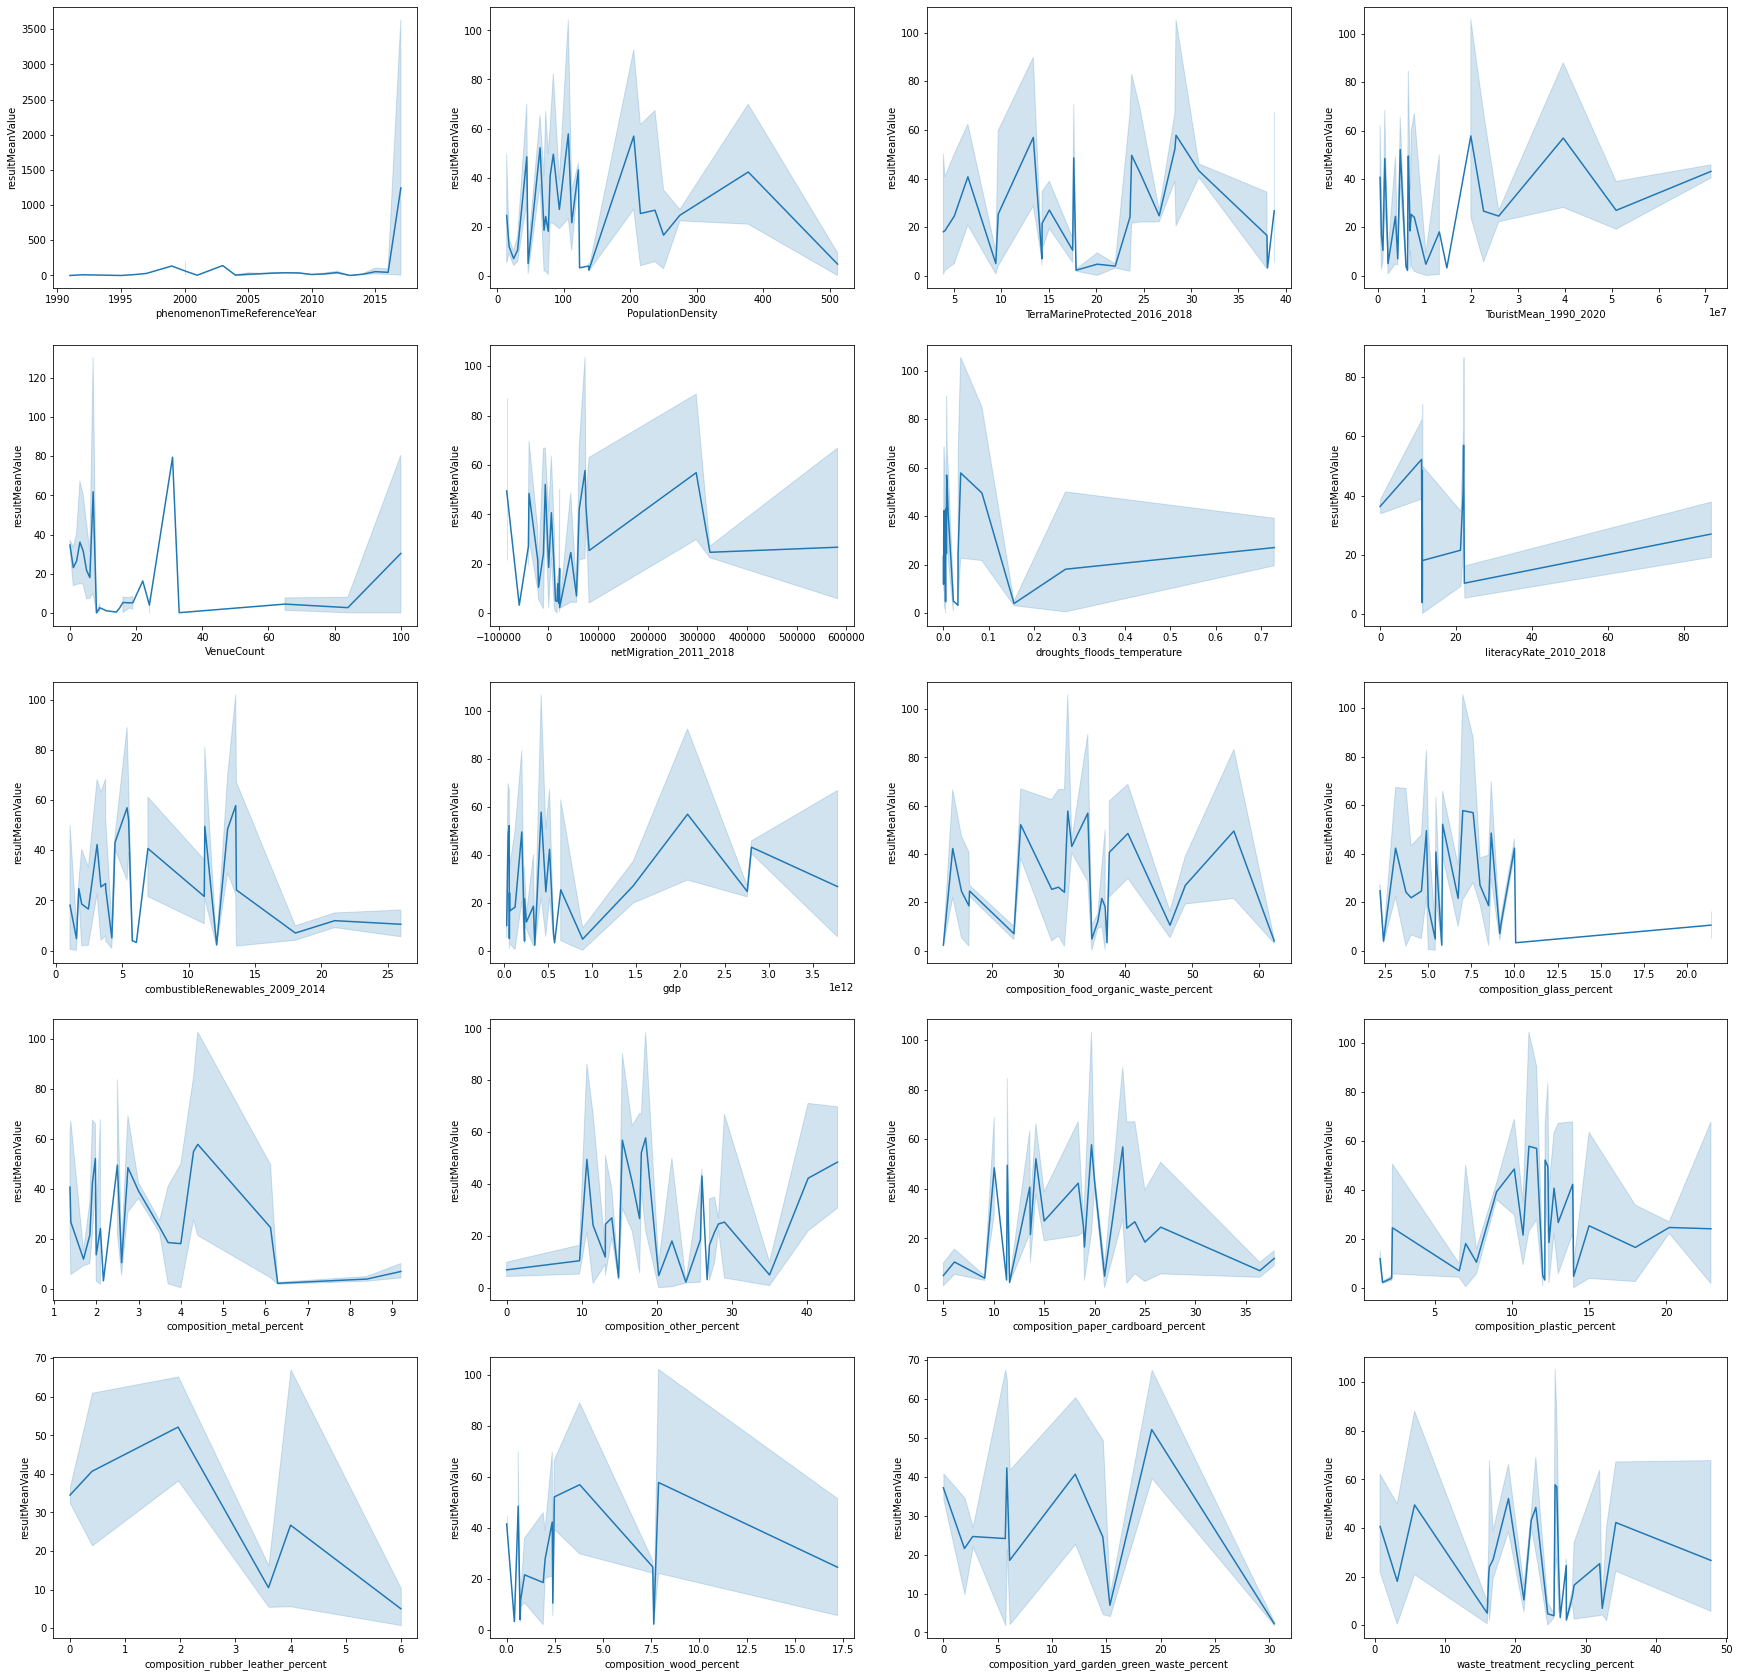

In [18]:
def plotNumerics(data,numericCols):
  numericCols = list(numericCols)
  numericCols.remove("resultMeanValue")
  plt.subplots(nrows=5,
               ncols=4,
               figsize = (30,30))
  for index, i in enumerate(numericCols):
    plt.subplot(5,4,index+1)
    sns.lineplot(x = i,
                 y= "resultMeanValue",
                 data = data)
    plt.xlabel(i)
    plt.ylabel("resultMeanValue")
  plt.show()

plotNumerics(data,numericData)

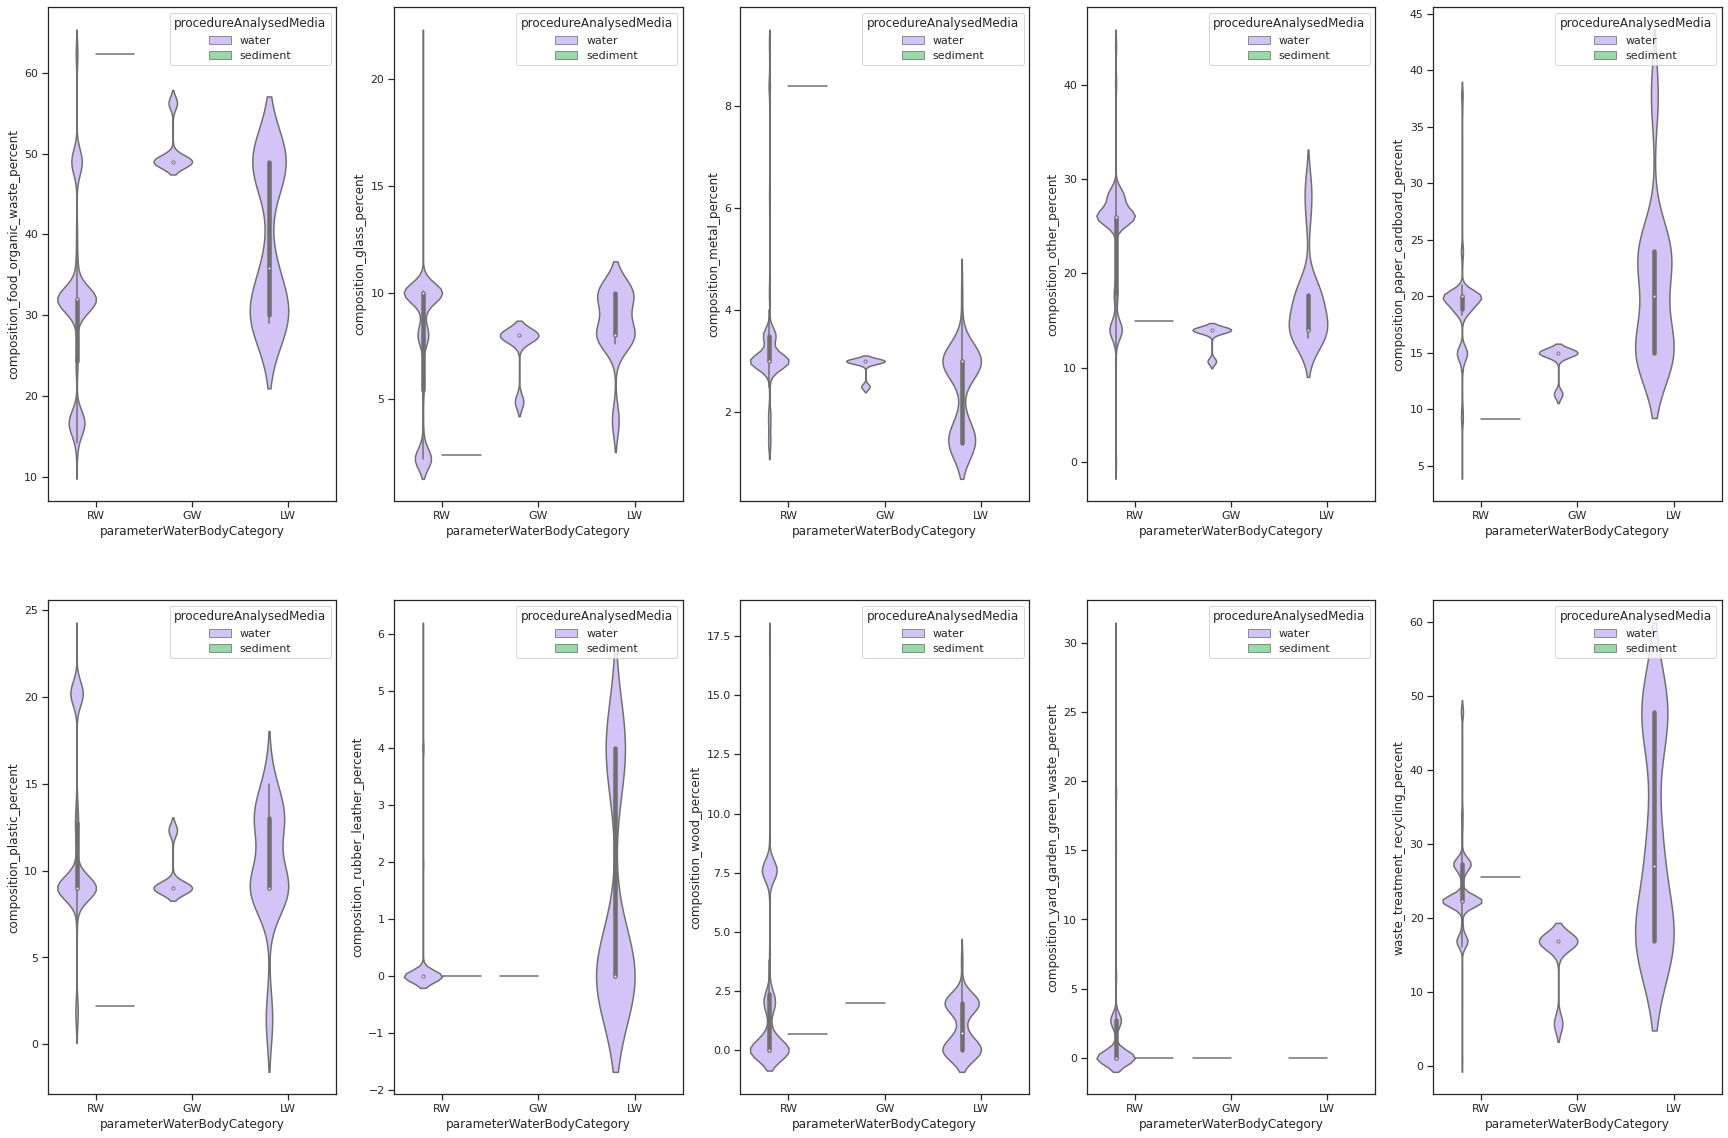

In [44]:
wasteDatas = ("composition_food_organic_waste_percent","composition_glass_percent","composition_metal_percent","composition_other_percent","composition_paper_cardboard_percent","composition_plastic_percent","composition_rubber_leather_percent",
              "composition_wood_percent","composition_yard_garden_green_waste_percent","waste_treatment_recycling_percent")
plt.subplots(nrows=2,ncols=5,figsize = (30,20))
for index,feature in enumerate(wasteDatas):
  plt.subplot(2,5,index+1)
  sns.violinplot(x="parameterWaterBodyCategory", y=feature,
              hue="procedureAnalysedMedia", palette=["m", "g"],
              data=data)
  plt.xlabel("parameterWaterBodyCategory")
  plt.ylabel(feature)
plt.show()

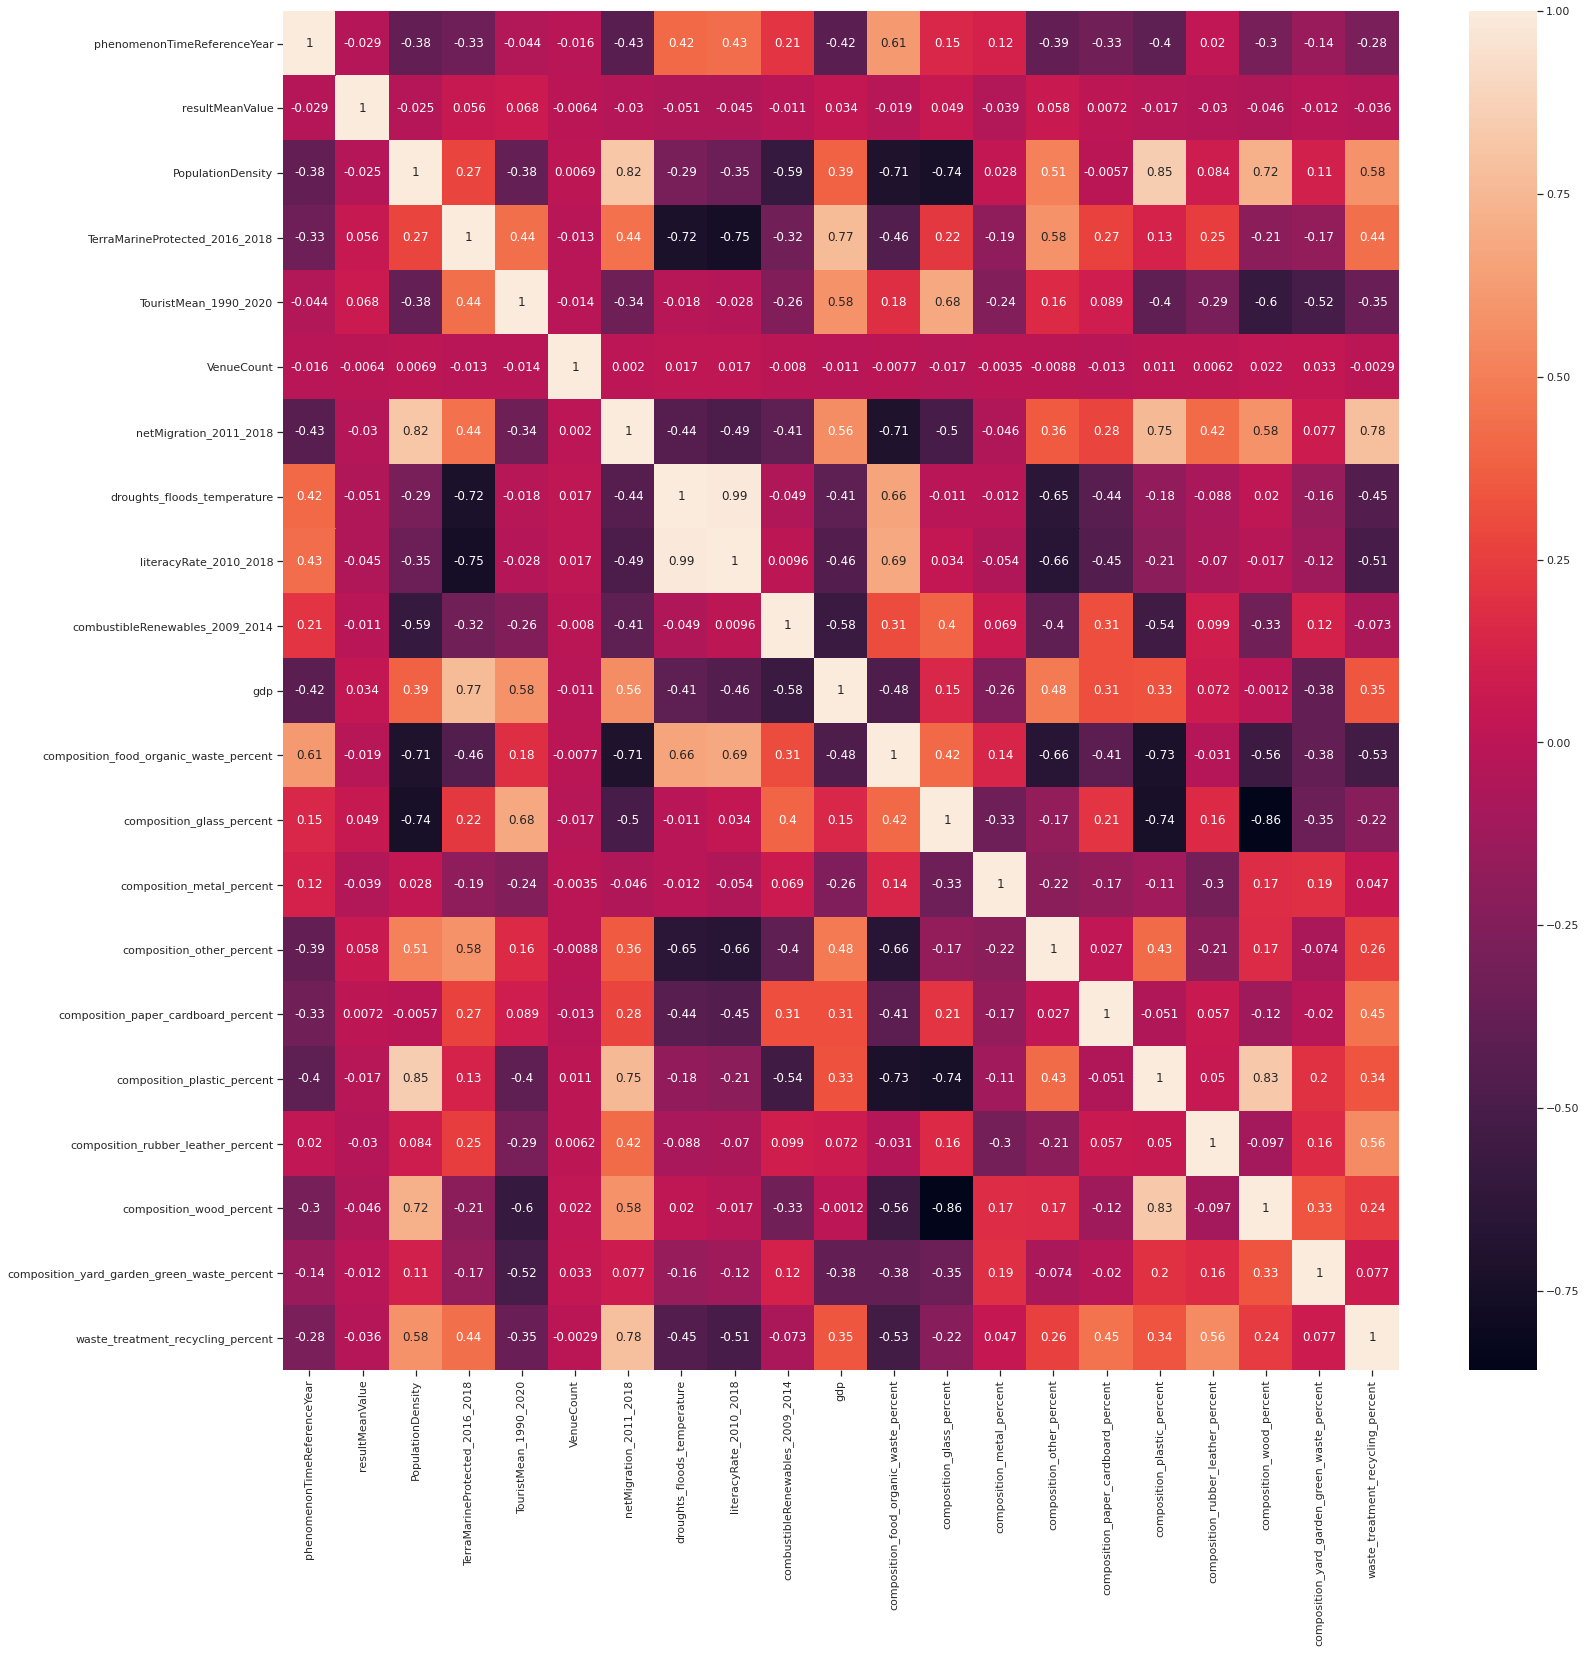

In [46]:
plt.figure(figsize=(25,25))
corr = data.corr()
sns.heatmap(corr,annot=True)
plt.show()